# CS148 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [27]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [54]:
heartdisease = pd.read_csv('heartdisease.csv') #load the dataset

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [29]:
heartdisease.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [30]:
heartdisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

In [31]:
heartdisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


The data looks pretty good already, since most of the data types are numerical. However, the only one that needs to be converted to numerical values is the 'sick' column, which currently has boolean data type. This is shouldn't be too difficult to convert, as we can assign '0' for False and '1' for True. 

### Determine if we're dealing with any null values. If so, report on which columns? 

In [32]:
heartdisease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

The heart disease dataset does not contain any null values, so we do not need to impute any of the data.

### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [33]:
heartdisease['sick'] = heartdisease['sick'].astype(int)
heartdisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,1


### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? 

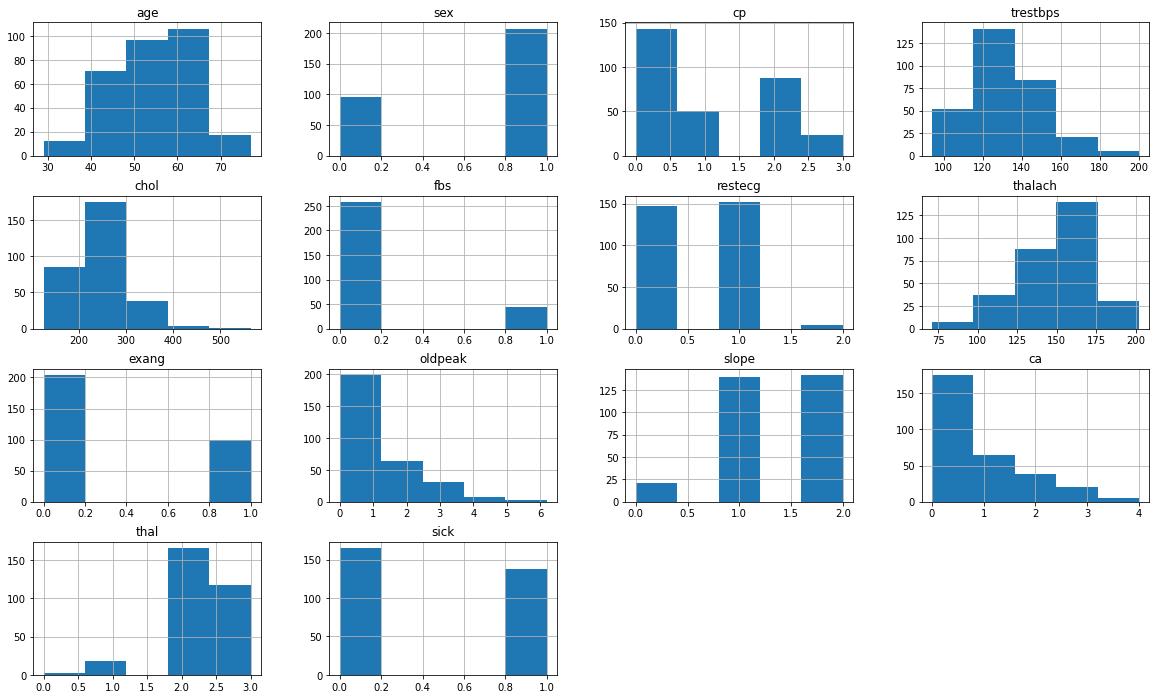

In [34]:
heartdisease.hist(bins = 5, figsize=(20,12))
plt.show()

The binary variables include sex, fbs, exang, and sick. The limited selection variables are cp, restecg, slope, ca, and thal. The gradient variables are age, trestbps, chol, thalach, and oldpeak.

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

0    165
1    138
Name: sick, dtype: int64

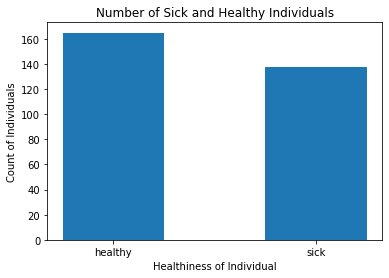

In [35]:
sickcount = heartdisease[heartdisease['sick'] == 1].shape[0] #number of sick individuals
healthycount = heartdisease[heartdisease['sick'] == 0].shape[0] #number of healthy individuals

#plotting count of sick and healthy individuals
plt.bar(x=['healthy','sick'], height=[healthycount, sickcount], width = 0.5)
plt.title('Number of Sick and Healthy Individuals')
plt.xlabel('Healthiness of Individual')
plt.ylabel('Count of Individuals')

heartdisease['sick'].value_counts()


This data set has 165 healthy individuals and 138 sick individuals. The number of individuals in each set is roughly equal, so this dataset is balanced enough to adequately classify the two.

### Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

A problem that might arise by artificially balancing a dataset is by introducing bias into the dataset. To artificially balance a dataset, you could throw out data from the category that has more samples. However, this gets rid of data that could potentially be used. The other way is to generate more data for the category that has less samples. However, this also depends on the model being used to generate the data. Both of these methods could introduce bias into the data, which could also potentially change the correlation of the features. There also might be a reason for the imbalanced dataset, so balancing it would mess with the frequencies in the dat, loosing further information.  

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

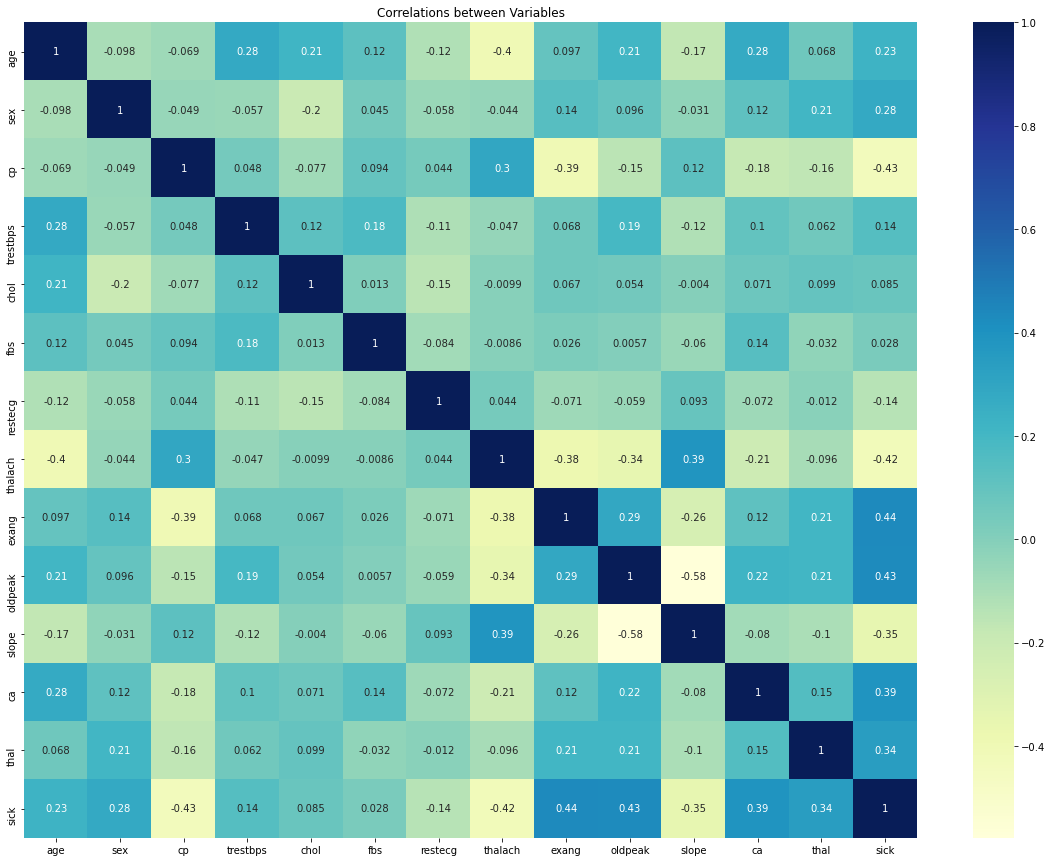

In [36]:
print(heartdisease.corr()) #printing correlation values

#plotting heatmap of correlations between variables
plt.figure(figsize=(20,15))
plt.title('Correlations between Variables')
corrvalues = sns.heatmap(heartdisease.corr(), cmap="YlGnBu", annot=True)
plt.show()

There are several variables that show correlation. There is a positive correlation (0.44) between variables "sick" and "exang," which refers to the presence of exercise induced angina. This makes sense because exercise induced angina is a type of pain in the lower chest or belly, which is related to the feeling of being sick or nauseous. There also a positive correlation (0.43) between "sick" and "oldpeak," which refers to depression induced by exercise relative to rest. This makes sense because people don't tend to get depressed when they exercise. Another positive correlation (0.39) is between variables "thalach," which refers to maximum heart rate achieved, and "slope," which refers to the activity of blood flow in the heart. For example, having a downslope, means the slope is decreasing, therefore, blood is flowing back into the heart when it is trying to pump blood out. This is linked to weaker hearts, and also having a lower maximum heart rate. Lastly, there is also a positive correlation (0.39) between "sick" and  "ca," which refers to number of major vessels colored by fluoroscopy. Fluoroscopy is a procedure that allows real-time video of movements inside the body. More blood vessels being visible could indicate blood clotting, which results in sickness.

There is a negative correlation (-0.58) between variables "oldpeak" and "slope." This could be explained because a downsloping ST segment is unhealthy, so it could be correlated with higher depression induced by exercise. There is also a negative correlation (-0.42) between variables "sick" and "thalach." The higher the maximum heart rate, the more healthy the individual is. Another negative correlation (-0.35) is between variables "sick" and "slope." Again, this could be due to having a downsloping ST segment, which is unhealthy, leading to a individual being sick.

## Part 2. Prepare the 'Raw' Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe. 

In [55]:
heartdisease_labels = heartdisease['sick'].copy() #creating a copy of the labels

heartdisease = heartdisease.drop('sick', axis = 1) #dropping the labels from the dataframe

### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split() method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [132]:
#splitting into training and testing data
Xrawtrain, Xrawtest, Ytrain, Ytest = train_test_split(heartdisease, heartdisease_labels, 
                                                            test_size = 0.2, random_state = 42)

#printing out the shapes of the samples
print("Xrawtrain shape:", Xrawtrain.shape)
print("Xrawtest shape:", Xrawtest.shape)
print("Ytrain shape:", Yrawtrain.shape)
print("Ytest shape:", Yrawtest.shape)

Xrawtrain shape: (242, 13)
Xrawtest shape: (61, 13)
Ytrain shape: (242,)
Ytest shape: (61,)


### We'll explore how not processing your data can impact model performance by using the K-Nearest Neighbor classifier. One thing to note was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our raw data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [146]:
# k-Nearest Neighbors algorithm
knnraw = KNeighborsClassifier()
knnraw.fit(Xrawtrain, Ytrain)

predrawtrain = knnraw.predict(Xrawtrain)
print("Accuracy for Training Data:", metrics.accuracy_score(Ytrain,predrawtrain))

predraw = knnraw.predict(Xrawtest)
print("Accuracy for Testing Data:", metrics.accuracy_score(Ytest, predraw))

Accuracy for Training Data: 0.7603305785123967
Accuracy for Testing Data: 0.6885245901639344


Overall, the accuracy score for this model is around 0.69, which means the model is performing averagely. On the training data, the model performed better, with a score of 0.76, which is considered kind of good. However, I think the model isn't performing too terribly, considering that it used raw training data that was not preprocessed. 

### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler. Use the fit_transform() to fit this pipeline to your training data. and then transform() to apply that pipeline to your test data

### Pipeline:

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

#remove categorical variables
heartdiseasedropped = heartdisease.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 
                                         'slope', 'thal'], axis = 1)

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

numerical_features = list(heartdiseasedropped)
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features),
    ])

full_pipeline = full_pipeline.fit(Xrawtrain)
Xtrain = full_pipeline.transform(Xrawtrain)
Xtrain

array([[-1.35679832, -0.61685555,  0.91403366, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.38508599,  1.1694912 ,  0.43952674, ...,  0.        ,
         0.        ,  1.        ],
       [-0.92132724,  1.1694912 , -0.30070405, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.58263146,  1.76494012, -0.24376322, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92132724, -0.61685555,  0.04094093, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.92942484,  0.57404228, -0.98399402, ...,  0.        ,
         1.        ,  0.        ]])

In [82]:
# Pipeline my test data
Xtest = full_pipeline.transform(Xrawtest)
Xtest

array([[ 0.27621823,  1.1694912 ,  0.5534084 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.49395376,  2.36038903,  0.78117172, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.27621823,  1.1694912 , -2.29363312, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.47376369,  0.81222185, -1.02195457, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.60282153,  0.87176674,  0.66729006, ...,  0.        ,
         0.        ,  1.        ],
       [-0.48585616,  1.1694912 , -0.07294073, ...,  0.        ,
         0.        ,  1.        ]])

### Now retrain your model and compare the accuracy metrics with the raw and pipelined data. 

In [86]:
# k-Nearest Neighbors algorithm
knn = KNeighborsClassifier()
knn.fit(Xtrain, Ytrain)

knnpredtrain = knn.predict(Xtrain)
print("Accuracy for training data:", metrics.accuracy_score(Ytrain, knnpredtrain))

knnpredtest = knn.predict(Xtest)
print("Accuracy for testing data:", metrics.accuracy_score(Ytest, knnpredtest))

Accuracy for training data: 0.871900826446281
Accuracy for testing data: 0.8852459016393442


The accuracy for the model using pipelined data is around 0.88, which is much higher than for the model using raw data, which was around 0.69. The difference between the two model is around 0.19. This means that this model is working a lot better (19% better), with 88% of the predictions being accurate. 

### Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [93]:
knn_results = [] #to store the results

n_values = [1, 2, 3, 5, 7, 9, 10, 20, 50] 

#for loop to go through each iteration of fitting a model with n_values
for i in n_values:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xtrain, Ytrain)
    
    trainscore = knn.score(Xtrain, Ytrain)
    testscore = knn.score(Xtest, Ytest)
    
    knn_results.append((i, trainscore, testscore))

knn_r = pd.DataFrame(knn_results, columns = ['n value', 'Train Score', 'Test Score'])
knn_r

,n value,Train Score,Test Score
0,1,1.000000,0.852459
1,2,0.880165,0.885246
2,3,0.888430,0.852459
3,5,0.871901,0.885246
4,7,0.876033,0.885246
5,9,0.842975,0.885246
6,10,0.830579,0.885246
7,20,0.826446,0.901639
8,50,0.818182,0.885246


From these results, the most optimal n value is 20, with an accuracy score of around 90%.

## Part 3. Additional Learning Methods 

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### Logistic Regression

Let's now try another classifier,one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. 

### This time in addition to accuracy report metrics for: 
1.   Accuracy
2.   Precision
3.   Recall
4.   F1 Score



In [94]:
# Logistic Regression
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(Xtrain, Ytrain)

LogisticRegression(solver='liblinear')

In [95]:
logregpred = logreg.predict(Xtest)

print("Accuracy:", metrics.accuracy_score(Ytest, logregpred))
print("Precision:", metrics.precision_score(Ytest, logregpred))
print("Recall:", metrics.recall_score(Ytest, logregpred))
print("F1 Score:", metrics.f1_score(Ytest, logregpred))

Accuracy: 0.9016393442622951
Precision: 0.8709677419354839
Recall: 0.9310344827586207
F1 Score: 0.9


The model performs fairly well, with good accuracy report metrics for accuracy (0.90), precision (0.87), recall (0.93), and f1 (0.9). 

### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

Accuracy is the fraction of predictions that the model got correct (accuracy = number of correct predictions / total number of predictions). Accuracy is important as it tells us how often we can expect our model to correctly predict an outcome. This method to evaluate a model is best for when neither false negatives or false positives are more important to catch than the other because it only considers the number of true positives and true negatives made buy the model. For example, for a model is being used to predict whether a patient has a disease, a false positive wouldn't be as severe as a false negative. This metric is also not very reliable to use when dealing with imbalanced datasets. 

Precision is the fraction of samples that were classified as positives that were correct. It is the ratio of true positives to the sum of true positives and false positives. It tells us how many of the positively labelled points are actually positive. An example of where you would want greater precision is spam email filters, because a large number of false positive means that a lot of important emails are being tagged as spam. Also, this is a very useful measure when the datasets are very imbalanced.

Recall is the ability to correctly predict the positives out of actual positives. It is the ratio of true positives to the sum of true positives and false negatives. This method is useful when evaluating models where we want a high accuracy because it measures how good the model is at identifying all actual positives out of all the positives that exist in the dataset. For example, for a credit card fraud detection system, you would want a high recall score to avoid false negatives, which would mean less fraud. This is also a usebul metric for imbalanced datasets.

F1 score is the weighted average of the recall and precision score (f1 score = 2 * precision score * recall score / (precision score + recall score). This is useful to use when neither false negatives or false positives are important to consider than another. This is also useful to use when choosing either precision or recall score can result in compromise because takes into account the balance between both of those scores.

### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Let's see how your results change!

In [97]:
# Logistic Regression
logreg2 = LogisticRegression(solver = 'sag', max_iter = 10, penalty = 'none')
logreg2.fit(Xtrain, Ytrain)

logregpred2 = logreg2.predict(Xtest)
print("Accuracy:", metrics.accuracy_score(Ytest, logregpred2))
print("Precision:", metrics.precision_score(Ytest, logregpred2))
print("Recall:", metrics.recall_score(Ytest, logregpred2))
print("F1 Score:", metrics.f1_score(Ytest, logregpred2))

Accuracy: 0.8852459016393442
Precision: 0.84375
Recall: 0.9310344827586207
F1 Score: 0.8852459016393444


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


The results come out slightly worse than the model above, but overall, the model still performs fairly well. 

### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [112]:
# Logistic Regression
logreg3 = LogisticRegression(solver = 'sag', max_iter = 3800, penalty = 'none')
logreg3.fit(Xtrain, Ytrain)

logregpred3 = logreg3.predict(Xtest)
print("Accuracy:", metrics.accuracy_score(Ytest, logregpred3))
print("Precision:", metrics.precision_score(Ytest, logregpred3))
print("Recall:", metrics.recall_score(Ytest, logregpred3))
print("F1 Score:", metrics.f1_score(Ytest, logregpred3))

Accuracy: 0.8852459016393442
Precision: 0.8666666666666667
Recall: 0.896551724137931
F1 Score: 0.8813559322033899


Compared to the model above, the accuracy and f1 score are around the same. But, this model has a higher precision (0.87) compared to the model above (0.84). However, this model has a lower recall score (0.90) than the model above (0.93).

### Explain what you changed, and why do you think that may have altered the outcome. 

I changed the "max_iter" parameter of the logistic regression model from 10 to 3800. This may have altered the outcome because with more iterations, the model is more likely to converge and find the correct parameters. However, there isn't really much of an improvement in the model with a higher max_iter rate. This might be due to the dataset being able to converge quickly, so there won't be a significant improvement in performance. 

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

In [113]:
logreg4 = LogisticRegression(solver = 'liblinear', penalty = 'l1')
logreg4.fit(Xtrain, Ytrain)

logregpred4 = logreg4.predict(Xtest)
print("Accuracy:", metrics.accuracy_score(Ytest, logregpred4))
print("Precision:", metrics.precision_score(Ytest, logregpred4))
print("Recall:", metrics.recall_score(Ytest, logregpred4))
print("F1 Score:", metrics.f1_score(Ytest, logregpred4))

Accuracy: 0.9016393442622951
Precision: 0.8709677419354839
Recall: 0.9310344827586207
F1 Score: 0.9


The results of this model show that it performs well, with an accuracy of 0.90, precision of 0.87, recall of 0.93, and f1 of 0.9. These results show an improvement from the previous two models.

### Explain what what the two solver approaches are, and why liblinear may have produced an improved outcome (but not always, and it's ok if your results show otherwise!). 

The penalty 'l1' limits the size of the coefficients by using the sum of the absolute values of the parameters. This can be helpful by eradicating unimportant features in the dataset. The liblinear solver might have produced an improved outcome because it is efficient for training large-scale problems. 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [114]:
# SVM
svm = SVC(probability = True)
svm.fit(Xtrain, Ytrain)

SVC(probability=True)

### Report the accuracy, precision, recall, F1 Score, of your model, but in addition, plot a Confusion Matrix of your model's performance

recommend using the `from sklearn.metrics import plot_confusion_matrix` library for this one!


In [135]:
svmpred = svm.predict(Xtest)

print("Accuracy:", metrics.accuracy_score(Ytest, svmpred))
print("Precision:", metrics.precision_score(Ytest, svmpred))
print("Recall:", metrics.recall_score(Ytest, svmpred))
print("F1 Score:", metrics.f1_score(Ytest, svmpred))

Accuracy: 0.9016393442622951
Precision: 0.8709677419354839
Recall: 0.9310344827586207
F1 Score: 0.9


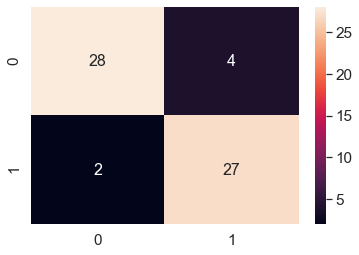

In [122]:
cnf_matrix = confusion_matrix(Ytest, svmpred)

cnf_matrix_plot = pd.DataFrame(cnf_matrix, range(2), range(2))

sns.set(font_scale = 1.4)
sns.heatmap(cnf_matrix_plot, annot=True, annot_kws={"size": 16})

plt.show()

### Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

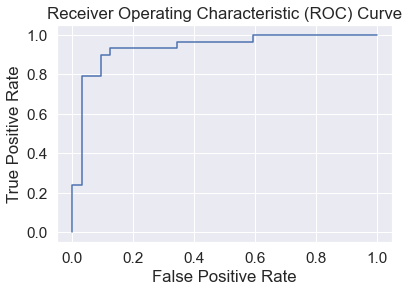

In [141]:
svmpredprob = svm.predict_proba(Xtest)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(Ytest, svmpredprob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

The ROC curve is a probability curve that plots the relationship between false positive and true positive rates. It tells how well the model can distinguish between classes. The greater the area under an ROC curve, the more useful the test is. These results indicate an average area under the ROC curve, so the model isn't particularly great at distinguishing between positives and negatives.

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [142]:
# SVM
svm2 = SVC(probability = True, kernel = 'linear')
svm2.fit(Xtrain, Ytrain)

SVC(kernel='linear', probability=True)

In [143]:
svmpred2 = svm2.predict(Xtest)

print("Accuracy:", metrics.accuracy_score(Ytest, svmpred2))
print("Precision:", metrics.precision_score(Ytest, svmpred2))
print("Recall:", metrics.recall_score(Ytest, svmpred2))
print("F1 Score:", metrics.f1_score(Ytest, svmpred2))

Accuracy: 0.8524590163934426
Precision: 0.8125
Recall: 0.896551724137931
F1 Score: 0.8524590163934426


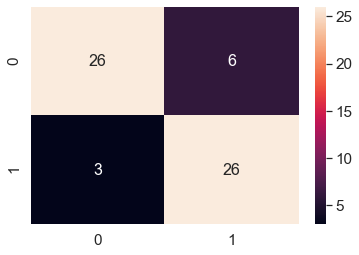

In [144]:
cnf_matrix2 = confusion_matrix(Ytest, svmpred2)

cnf_matrix_plot2 = pd.DataFrame(cnf_matrix2, range(2), range(2))

sns.set(font_scale = 1.4)
sns.heatmap(cnf_matrix_plot2, annot=True, annot_kws={"size": 16})

plt.show()

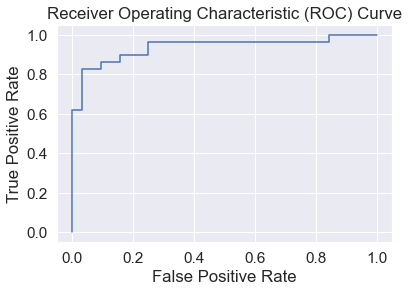

In [145]:
svmpredprob2 = svm2.predict_proba(Xtest)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(Ytest, svmpredprob2)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

The new results show that the model is performing slightly worse than the previous model. Changing the kernel to linear is used when the data is linearly separable. This dataset may not be nicely separated with a single line, so it is performing worse.

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

SVM is based on geometrical properties of the data while logistic regression is based on statistical approches. The risk of overfitting is less in SVM, and logistic regression is vulnerable to overfitting.